# Práctica 4c : Salarios en EEUU

Existen muchas técnicas de transformación de datos, entre ellas, hay muchas que utilizan parámetros, como la media y la desviación estándar de la normalización o una tabla de conversión en la codificación de categorías. Un error común en el uso de la transformación variable es transformar el conjunto de entrenamiento y el conjunto de pruebas por separado utilizando parámetros diferentes. La transformación de los datos de entrenamiento y los datos de prueba debe hacerse utilizando los mismos parámetros, y normalmente se obtienen del conjunto de entrenamiento; de lo contrario, no podemos comparar los resultados justamente.

In [1]:
import pandas as pd

path = 'salarios.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,FUNDTYPE,DEPARTMENTCODE,DEPARTMENTDESCRIPTION,FUNDCODE,FUNDDESCRIPTION,ORGANIZATIONCODE,ORGANIZATIONDESCRIPTION,DIVISIONCODE,DIVISIONDESCRIPTION,SECTIONCODE,...,SUBSECTIONDESCRIPTION,SCHEDULE/GRADE,BARGAININGUNIT,TITLECODE,TITLEDESCRIPTION,BUDGETEDUNIT,TOTALBUDGETEDUNIT,POSITIONCONTROL,BUDGETEDPAYRATE,TOTALBUDGETEDAMOUNT
0,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,9,9901,Mayor,Annual,1,1,216210.0,216210.0
1,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,0,9637,Administrative Assistant,Annual,1,1,74208.0,74208.0
2,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,0,9637,Administrative Assistant,Annual,1,1,58752.0,58752.0
3,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,9,9617,Administrative Secretary,Annual,1,1,84972.0,84972.0
4,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3010,...,NaN,1 00,9,9899,Chief of Staff,Annual,1,1,195000.0,195000.0


In [3]:
df.dtypes

FUNDTYPE                    object
DEPARTMENTCODE               int64
DEPARTMENTDESCRIPTION       object
FUNDCODE                    object
FUNDDESCRIPTION             object
ORGANIZATIONCODE             int64
ORGANIZATIONDESCRIPTION     object
DIVISIONCODE                object
DIVISIONDESCRIPTION         object
SECTIONCODE                 object
SECTIONDESCRIPTION          object
SUBSECTIONCODE               int64
SUBSECTIONDESCRIPTION       object
SCHEDULE/GRADE              object
BARGAININGUNIT               int64
TITLECODE                   object
TITLEDESCRIPTION            object
BUDGETEDUNIT                object
TOTALBUDGETEDUNIT            int64
POSITIONCONTROL              int64
BUDGETEDPAYRATE            float64
TOTALBUDGETEDAMOUNT        float64
dtype: object

## Estandarización
La transformación más típica de una variable numérica es la transformación de los valores de la variable a otro conjunto de valores con media μ=0 y desviación estándar σ=1 utilizando la resta y la división

In [4]:
from sklearn.preprocessing import StandardScaler

train_data = pd.DataFrame({'var1':[0, 0, 1, 1]})
test_data = pd.DataFrame({'var1':[1.5]})

print("train:\n", train_data)
print("test:\n", test_data)

scaler = StandardScaler()
scaler.fit(train_data)
print("transformación train:\n", pd.DataFrame(scaler.transform(train_data)))
print("transformación test:\n", pd.DataFrame(scaler.transform(test_data)))

print("media:", scaler.mean_)
print("desviación estándar:", scaler.var_)

train:
    var1
0     0
1     0
2     1
3     1
test:
    var1
0   1.5
transformación train:
      0
0 -1.0
1 -1.0
2  1.0
3  1.0
transformación test:
      0
0  2.0
media: [0.5]
desviación estándar: [0.25]


## Escala min-max
La escala mín-máx es otra de las simples transformaciones de las variables numéricas. Con la escala mín-máx, los valores deben ser convertidos a los valores dentro de [0,1].



In [5]:
from sklearn.preprocessing import MinMaxScaler

train_data = pd.DataFrame({'var1':[-1, 0, 1, 2]})
test_data = pd.DataFrame({'var1':[2.5]})

print("train:\n", train_data)
print("test:\n", test_data)

scaler = MinMaxScaler()
scaler.fit(train_data)
print("transformación train:\n", pd.DataFrame(scaler.transform(train_data)))
print("transformación test:\n", pd.DataFrame(scaler.transform(test_data)))

train:
    var1
0    -1
1     0
2     1
3     2
test:
    var1
0   2.5
transformación train:
           0
0  0.000000
1  0.333333
2  0.666667
3  1.000000
transformación test:
           0
0  1.166667


In [6]:
train_data = pd.DataFrame({'var1':[-1, 0, 1, 250]}) # Data including outlier.
scaler = MinMaxScaler()
scaler.fit(train_data)
print("transformación train:\n", pd.DataFrame(scaler.transform(train_data)))

transformación train:
           0
0  0.000000
1  0.003984
2  0.007968
3  1.000000


## Transformación logarítmica
Cuando la distribución de la variable tiene una distribución de larga duración (long-tailed distribution) (por ejemplo, ingresos individuales, gastos médicos individuales, etc.), las transformaciones logarítmicas pueden ajustar la distribución de los datos a una distribución menos sesgada, por ejemplo, de tipo gaussiano.
Se supone que la transformación logarítmica generalizada debe afinar el parámetro lambda λ para que la distribución de los datos se acerque más a la distribución normal. Ahora recuerda que no debes cambiar el parámetro para el conjunto de entrenamiento y la prueba se ha discutido arriba en "Información general sobre la transformación de datos".

In [8]:
import numpy as np

train_data = pd.DataFrame({'var1':[1,10, 100, 1000, 10000, 100000]})
test_data = pd.DataFrame({'var1':[2.5]})

print("train:\n", train_data)
print("transformación train:\n", pd.DataFrame(np.log1p(train_data)))


train:
      var1
0       1
1      10
2     100
3    1000
4   10000
5  100000
transformación train:
         var1
0   0.693147
1   2.397895
2   4.615121
3   6.908755
4   9.210440
5  11.512935


## Transformación de Box-Cox
La transformación de Box-Cox es una función compuesta con la transformación log(xi) y una transformación x−1 dependiendo del valor de lambda.

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

train_data = pd.DataFrame({'var1':[1,10, 100, 1000, 10000, 100000]})

pt = PowerTransformer(method='box-cox')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("train:\n", train_data)
print("transformación train:\n", pd.DataFrame(train_data_trans))

print("lambdas:", pt.lambdas_) # Automatically selected 
print("media:", np.mean(train_data_trans)) 
print("desviación estándar:", np.std(train_data_trans)) 

train:
      var1
0       1
1      10
2     100
3    1000
4   10000
5  100000
transformación train:
          0
0 -1.46385
1 -0.87831
2 -0.29277
3  0.29277
4  0.87831
5  1.46385
lambdas: [-1.28051431e-08]
media: 7.401486830834377e-17
desviación estándar: 1.0


## Transformación Yeo-Johnson
La transformación de Yeo-Johnson es una función compuesta de transformación que permite valores negativos, a diferencia de la transformación de Box-Cox.

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

train_data = pd.DataFrame({'var1':[-1, 1, 10, 100, 1000, 10000, 100000]})

pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("train:\n", train_data)
print("transformación train:\n", pd.DataFrame(train_data_trans))

print("lambdas:",pt.lambdas_) # Automatically selected 
print("media:", np.mean(train_data_trans)) 
print("desviación estándar:", np.std(train_data_trans)) 

train:
      var1
0      -1
1       1
2      10
3     100
4    1000
5   10000
6  100000
transformación train:
           0
0 -1.482118
1 -0.956150
2 -0.552452
3 -0.034887
4  0.491733
5  1.011375
6  1.522499
lambdas: [-0.00733166]
media: -9.516197353929913e-17
desviación estándar: 1.0


## Recorte
El recorte (clipping) es un enfoque para limitar o reducir los valores en puntos de valor específicos. Esto puede eliminar los valores atípicos, a costa de una posible pérdida de información de datos. El recorte se puede hacer fácilmente por medio de la función de clip de pandas o numpy. El siguiente código recorta los valores en el 1% y el 99% de los datos.

In [11]:
import pandas as pd

df = pd.DataFrame(np.random.randint(0,100,size=(10, 2)), columns=['BUDGETEDPAYRATE','TOTALBUDGETEDAMOUNT'])
df


,BUDGETEDPAYRATE,TOTALBUDGETEDAMOUNT
0,89,26
1,12,38
2,34,22
3,32,51
4,75,78
5,54,9
6,80,28
7,12,63
8,41,45
9,60,74


In [12]:
p25 = df[['BUDGETEDPAYRATE','TOTALBUDGETEDAMOUNT']].quantile(0.25)
p75 = df[['BUDGETEDPAYRATE','TOTALBUDGETEDAMOUNT']].quantile(0.75)
print("p01:\n", p25)
print("p99:\n", p75)

p01:
 BUDGETEDPAYRATE        32.5
TOTALBUDGETEDAMOUNT    26.5
Name: 0.25, dtype: float64
p99:
 BUDGETEDPAYRATE        71.25
TOTALBUDGETEDAMOUNT    60.00
Name: 0.75, dtype: float64


In [13]:
df[['BUDGETEDPAYRATE','TOTALBUDGETEDAMOUNT']] = df[['BUDGETEDPAYRATE','TOTALBUDGETEDAMOUNT']].clip(p25,p75,axis=1).astype('int')
df[['BUDGETEDPAYRATE','TOTALBUDGETEDAMOUNT']]

,BUDGETEDPAYRATE,TOTALBUDGETEDAMOUNT
0,71,26
1,32,38
2,34,26
3,32,51
4,71,60
5,54,26
6,71,28
7,32,60
8,41,45
9,60,60


## Binning
En Binning se agrupan los valores a intervalos distintos, y se utiliza un índice de grupo representativa de cada intervalo como una variable categórica. Se puede usar como una variable categórica ordinal o una variable numérica discreta tipo rango (discretizada). Como variable categórica también se puede trasnformar a numérica, mediante una codificación de un solo golpe (one-hot encoding) u otras transformaciones de variables categóricas.

In [14]:
import pandas as pd

df = pd.DataFrame(np.random.randint(0,1000,size=(10, 1)), columns=['ORGANIZATIONCODE '])
df

,ORGANIZATIONCODE
0,685
1,102
2,901
3,466
4,530
5,353
6,27
7,96
8,314
9,548


In [16]:
df['ORGANIZATIONCODE _binned'] = pd.cut(df['ORGANIZATIONCODE '], bins=10, labels=False) 
df[['ORGANIZATIONCODE ','ORGANIZATIONCODE _binned']]

,ORGANIZATIONCODE,ORGANIZATIONCODE _binned
0,685,7
1,102,0
2,901,9
3,466,5
4,530,5
5,353,3
6,27,0
7,96,0
8,314,3
9,548,5


## Rango
Este método funciona convirtiendo los valores numéricos en rangos de valores. Cuando se analiza el número de clientes en una tienda, es probable que el número de clientes en días festivos sea mucho mayor que el de los días de semana. Cambiar los números a rangos puede neutralizar el impacto del número absoluto de clientes.

In [17]:
import pandas as pd

df = pd.DataFrame(np.random.randint(0,100,size=(10, 1)), columns=['ORGANIZATIONCODE '])
df

,ORGANIZATIONCODE
0,27
1,61
2,77
3,89
4,74
5,39
6,46
7,1
8,71
9,97


## RankGauss
RankGauss es un enfoque para convertir los valores a rangos, y después convierte estos rangos a otro valor numérico siguiendo una distribución Gaussiana (ver el gráfico a continuación.)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import QuantileTransformer

df = pd.DataFrame(np.random.randint(0,100,size=(10, 2)), columns=['SUBSECTIONCODE ','TOTALBUDGETEDAMOUNT'])
df

,SUBSECTIONCODE,TOTALBUDGETEDAMOUNT
0,98,23
1,77,53
2,94,62
3,93,32
4,63,88
5,37,78
6,56,21
7,60,72
8,60,82
9,79,48


In [21]:
transformer = QuantileTransformer(n_quantiles=10, random_state=1111, output_distribution='normal')
transformer.fit(df[['TOTALBUDGETEDAMOUNT']])
df['TOTALBUDGETEDAMOUNT_RankGauss'] = transformer.transform(df[['TOTALBUDGETEDAMOUNT']])
df[['TOTALBUDGETEDAMOUNT','TOTALBUDGETEDAMOUNT_RankGauss']]

,TOTALBUDGETEDAMOUNT,TOTALBUDGETEDAMOUNT_RankGauss
0,23,-1.220640
1,53,-0.139710
2,62,0.139710
3,32,-0.764710
4,88,5.199338
5,78,0.764710
6,21,-5.199338
7,72,0.430727
8,82,1.220640
9,48,-0.430727


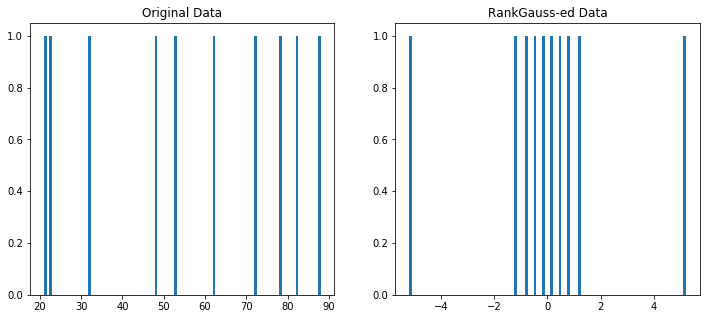

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(df['TOTALBUDGETEDAMOUNT'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(df['TOTALBUDGETEDAMOUNT_RankGauss'],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()